# 🏅 Exploratory Data Analysis - Olympic Games Data

## Projekt_OS - Olympic Games Data Analysis

Detta notebook innehåller en grundlig utforskning av olympisk data från Kaggle-datasetet "120 years of Olympic history: athletes and results".

### Dataset Information
- **Källa**: [120 years of Olympic history: athletes and results](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)
- **Fil**: `athlete_events.csv`
- **Storlek**: ~200MB, 271,116 rader, 15 kolumner
- **Tidsperiod**: 1896-2016
- **Fokus**: Kanada (CAN)

### Innehåll
1. Data Loading och Översikt
2. Grundläggande Statistik
3. Visualiseringar
4. Kanada-specifik Analys

## 1. Imports och Data Loading

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Sätt stil för visualiseringar
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Ladda data
data_path = os.path.join('..', 'data', 'athlete_events.csv')
df = pd.read_csv(data_path)
# Ensure figures directory exists to avoid FileNotFoundError when saving plots
figures_dir = os.path.join('..', 'figures')
os.makedirs(figures_dir, exist_ok=True)

print(f"Dataset shape: {df.shape}")
print(f"\nKolumner: {df.columns.tolist()}")
print(f"\nFörsta raderna:")
df.head()

Dataset shape: (271116, 15)

Kolumner: ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']

Första raderna:


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## 2. Grundläggande Statistik

### 2.1 Dataset Översikt

In [33]:
print("Dataset Översikt:\n")

print("Första 5 rader:")
print(df.head())

print("\nKolumner:")
print(df.columns.tolist())

print("\nInfo om data:")
print(df.info())

print("\nSaknade värden per kolumn:")
print(df.isna().sum())

Dataset Översikt:

Första 5 rader:
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight

### 2.2 Länder (NOC)

In [34]:
unique_countries = df["NOC"].unique()
number_of_countries = len(unique_countries)

print("Antal länder medverkande:")
print(number_of_countries)

print("\nNamn på medverkande länder (NOC):")
print(np.sort(unique_countries))


Antal länder medverkande:
230

Namn på medverkande länder (NOC):
['AFG' 'AHO' 'ALB' 'ALG' 'AND' 'ANG' 'ANT' 'ANZ' 'ARG' 'ARM' 'ARU' 'ASA'
 'AUS' 'AUT' 'AZE' 'BAH' 'BAN' 'BAR' 'BDI' 'BEL' 'BEN' 'BER' 'BHU' 'BIH'
 'BIZ' 'BLR' 'BOH' 'BOL' 'BOT' 'BRA' 'BRN' 'BRU' 'BUL' 'BUR' 'CAF' 'CAM'
 'CAN' 'CAY' 'CGO' 'CHA' 'CHI' 'CHN' 'CIV' 'CMR' 'COD' 'COK' 'COL' 'COM'
 'CPV' 'CRC' 'CRO' 'CRT' 'CUB' 'CYP' 'CZE' 'DEN' 'DJI' 'DMA' 'DOM' 'ECU'
 'EGY' 'ERI' 'ESA' 'ESP' 'EST' 'ETH' 'EUN' 'FIJ' 'FIN' 'FRA' 'FRG' 'FSM'
 'GAB' 'GAM' 'GBR' 'GBS' 'GDR' 'GEO' 'GEQ' 'GER' 'GHA' 'GRE' 'GRN' 'GUA'
 'GUI' 'GUM' 'GUY' 'HAI' 'HKG' 'HON' 'HUN' 'INA' 'IND' 'IOA' 'IRI' 'IRL'
 'IRQ' 'ISL' 'ISR' 'ISV' 'ITA' 'IVB' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ'
 'KIR' 'KOR' 'KOS' 'KSA' 'KUW' 'LAO' 'LAT' 'LBA' 'LBR' 'LCA' 'LES' 'LIB'
 'LIE' 'LTU' 'LUX' 'MAD' 'MAL' 'MAR' 'MAS' 'MAW' 'MDA' 'MDV' 'MEX' 'MGL'
 'MHL' 'MKD' 'MLI' 'MLT' 'MNE' 'MON' 'MOZ' 'MRI' 'MTN' 'MYA' 'NAM' 'NBO'
 'NCA' 'NED' 'NEP' 'NFL' 'NGR' 'NIG' 'NOR' 'NRU' 'NZL' 'OMA

### 2.3 Sporter


In [35]:
unique_sports = df["Sport"].unique()
number_of_sports = len(unique_sports)

print("\nAntal sporter:")
print(number_of_sports)

print("\nNamn på medverkande sporter:")
print(np.sort(unique_sports))


Antal sporter:
66

Namn på medverkande sporter:
['Aeronautics' 'Alpine Skiing' 'Alpinism' 'Archery' 'Art Competitions'
 'Athletics' 'Badminton' 'Baseball' 'Basketball' 'Basque Pelota'
 'Beach Volleyball' 'Biathlon' 'Bobsleigh' 'Boxing' 'Canoeing' 'Cricket'
 'Croquet' 'Cross Country Skiing' 'Curling' 'Cycling' 'Diving'
 'Equestrianism' 'Fencing' 'Figure Skating' 'Football' 'Freestyle Skiing'
 'Golf' 'Gymnastics' 'Handball' 'Hockey' 'Ice Hockey' 'Jeu De Paume'
 'Judo' 'Lacrosse' 'Luge' 'Military Ski Patrol' 'Modern Pentathlon'
 'Motorboating' 'Nordic Combined' 'Polo' 'Racquets' 'Rhythmic Gymnastics'
 'Roque' 'Rowing' 'Rugby' 'Rugby Sevens' 'Sailing' 'Shooting'
 'Short Track Speed Skating' 'Skeleton' 'Ski Jumping' 'Snowboarding'
 'Softball' 'Speed Skating' 'Swimming' 'Synchronized Swimming'
 'Table Tennis' 'Taekwondo' 'Tennis' 'Trampolining' 'Triathlon'
 'Tug-Of-War' 'Volleyball' 'Water Polo' 'Weightlifting' 'Wrestling']


### 2.4 Medaljtyper


In [36]:
medal_types = df["Medal"].dropna().unique()

print("Medaljtyper:")
print(medal_types)

Medaljtyper:
['Gold' 'Bronze' 'Silver']


### 2.5 Åldersstatistik


In [37]:
age_df = df["Age"].dropna()
age_stats = {"mean": age_df.mean(),
             "median": age_df.median(),
             "min": age_df.min(),
             "max": age_df.max(),
             "std": age_df.std()
            }
for key, value in age_stats.items():
    print(f"{key}: {value:.1f}")

mean: 25.6
median: 24.0
min: 10.0
max: 97.0
std: 6.4


## 3. Visualiseringar - Översikt

### 3.1 Könsfördelning


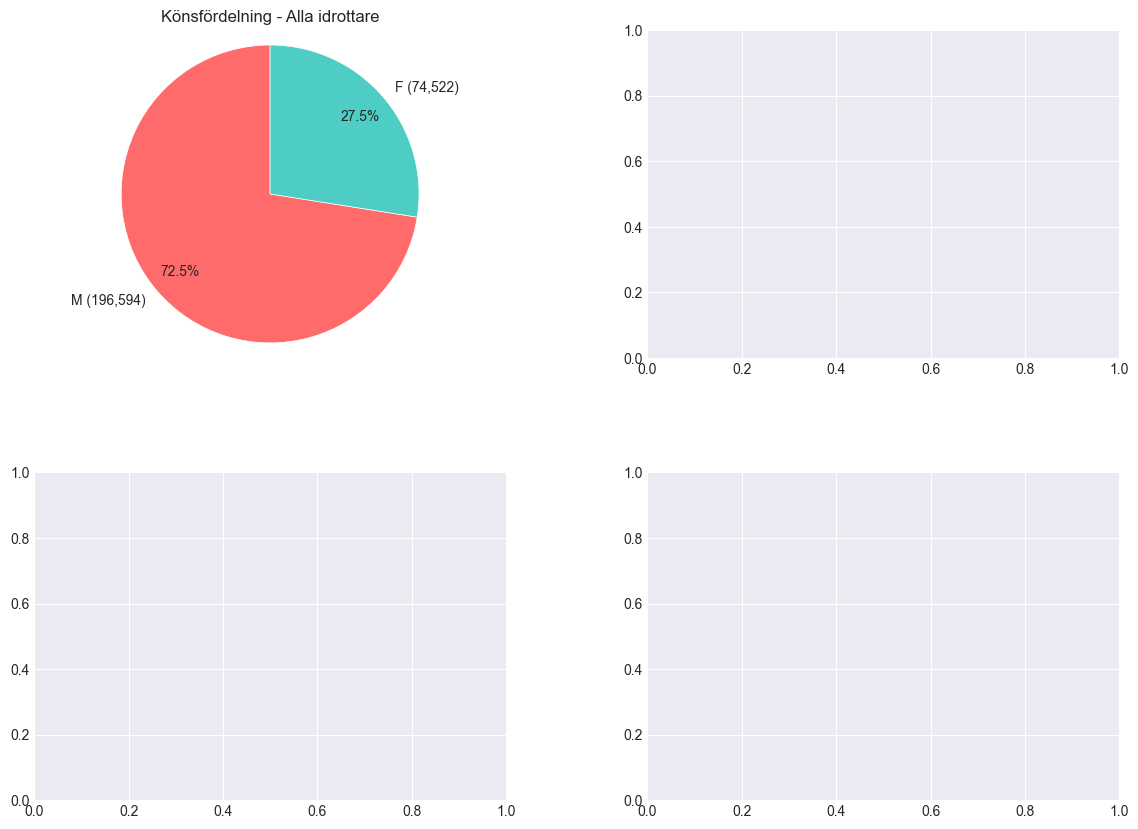

In [ ]:
# Könsfördelning - Alla idrottare
fig, ax = plt.subplots(figsize=(6, 6))

gender_counts = df['Sex'].value_counts(dropna=False)
if gender_counts.sum() > 0:
    labels = [f"{lbl} ({cnt:,})" for lbl, cnt in zip(gender_counts.index, gender_counts.values)]
    ax.pie(
        gender_counts.values,
        labels=labels,
        autopct='%1.1f%%',
        colors=['#FF6B6B', '#4ECDC4'],
        startangle=90,
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'},
        pctdistance=0.8
    )
    ax.set_title('Könsfördelning - Alla idrottare')
    ax.axis('equal')
else:
    ax.text(0.5, 0.5, 'Ingen data för kön', ha='center', va='center')

plt.tight_layout()
plt.savefig('../figures/gender_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### 3.2 Top 10 Länder - Medaljer


In [ ]:
# Topp 10 Länder - Medaljer
fig, ax = plt.subplots(figsize=(8, 6))

medal_counts = df[df['Medal'].notna()]['NOC'].value_counts().head(10).sort_values()
ax.barh(medal_counts.index, medal_counts.values, color='#2A9D8F')
ax.set_title('Topp 10 Länder - Medaljer')
ax.set_xlabel('Antal medaljer')
ax.set_ylabel('Land')
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('../figures/top10_medals.png', dpi=300, bbox_inches='tight')
plt.show()

### 3.3 Medaljer över tid


In [ ]:
# Medaljer över tid & Åldersfördelning
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Medaljer över tid
medals_over_time = df[df['Medal'].notna()].groupby('Year').size()
axes[0].plot(
    medals_over_time.index,
    medals_over_time.values,
    marker='o', color='#E76F51', linewidth=2, markersize=4
)
axes[0].set_title('Medaljer över tid')
axes[0].set_xlabel('År')
axes[0].set_ylabel('Antal medaljer')
axes[0].grid(True, alpha=0.3)

# Åldersfördelning
ages = df['Age'].dropna()
axes[1].hist(ages, bins=30, color='#264653', alpha=0.8, edgecolor='black')
axes[1].set_title('Åldersfördelning - Alla idrottare')
axes[1].set_xlabel('Ålder')
axes[1].set_ylabel('Frekvens')
axes[1].axvline(ages.mean(), color='red', linestyle='--', linewidth=2, label=f'Medel: {ages.mean():.1f}')
axes[1].legend()

plt.tight_layout()
plt.savefig('../figures/medals_age_overview.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

### 3.4 Åldersfördelning


## 4. Kanada-specifik Analys

### 4.1 Översikt - Kanadas Prestation

In [41]:
canada_df = df[df['NOC'] == 'CAN']

print(f"Deltagare från Kanada: {len(canada_df)}")
print(f"Antal unika deltagare från Kanada: {canada_df['ID'].nunique()}")

canada_medal_count = canada_df['Medal'].notna().sum()
print(f"Kanada har tagit {canada_medal_count} OS medaljer")
canada_medals = canada_df[canada_df['Medal'].notna()]['Medal'].value_counts().to_string()
print("Kanadas medaljfördelning")
print(canada_medals)

winter_medals = canada_df[(canada_df['Season'] == 'Winter') & (canada_df['Medal'].notna())].shape[0]
summer_medals = canada_df[(canada_df['Season'] == 'Summer') & (canada_df['Medal'].notna())].shape[0]
print(f"Kanada har tagit {winter_medals} vinter medaljer och {summer_medals} sommar medaljer")

Deltagare från Kanada: 9733
Antal unika deltagare från Kanada: 4811
Kanada har tagit 1352 OS medaljer
Kanadas medaljfördelning
Medal
Gold      463
Bronze    451
Silver    438
Kanada har tagit 611 vinter medaljer och 741 sommar medaljer


### 4.2 Kanadas Toppsporter

<function matplotlib.pyplot.show(close=None, block=None)>

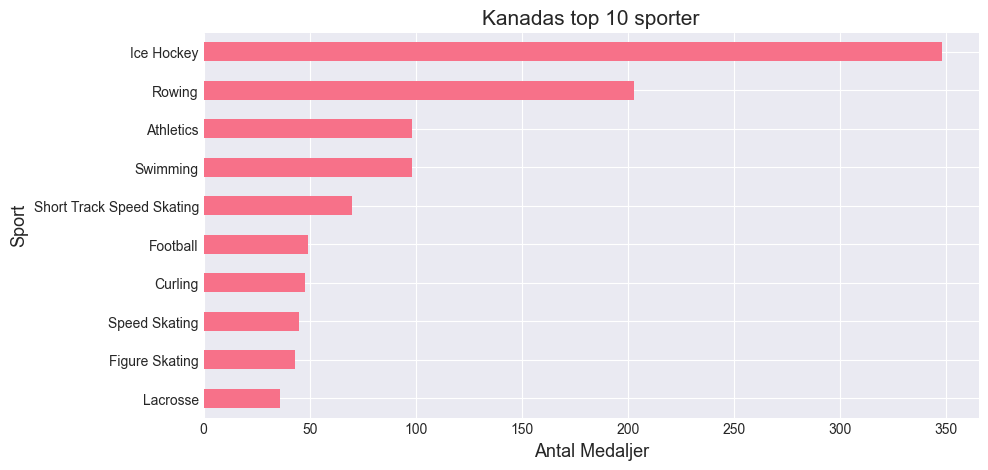

In [ ]:
canadas_top_sport = canada_df[canada_df['Medal'].notna()]['Sport'].value_counts().head(10)
plt.figure(figsize=(10,5))
canadas_top_sport.sort_values().plot(kind='barh', color='#8ECAE6', edgecolor='black')
plt.title("Kanadas topp 10 sporter", fontsize=15)
plt.xlabel("Antal medaljer", fontsize=13)
plt.ylabel("Sport", fontsize=13)
plt.tight_layout()
plt.savefig('../figures/canada_top_sports.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.3 Kanadas Medaljer per OS

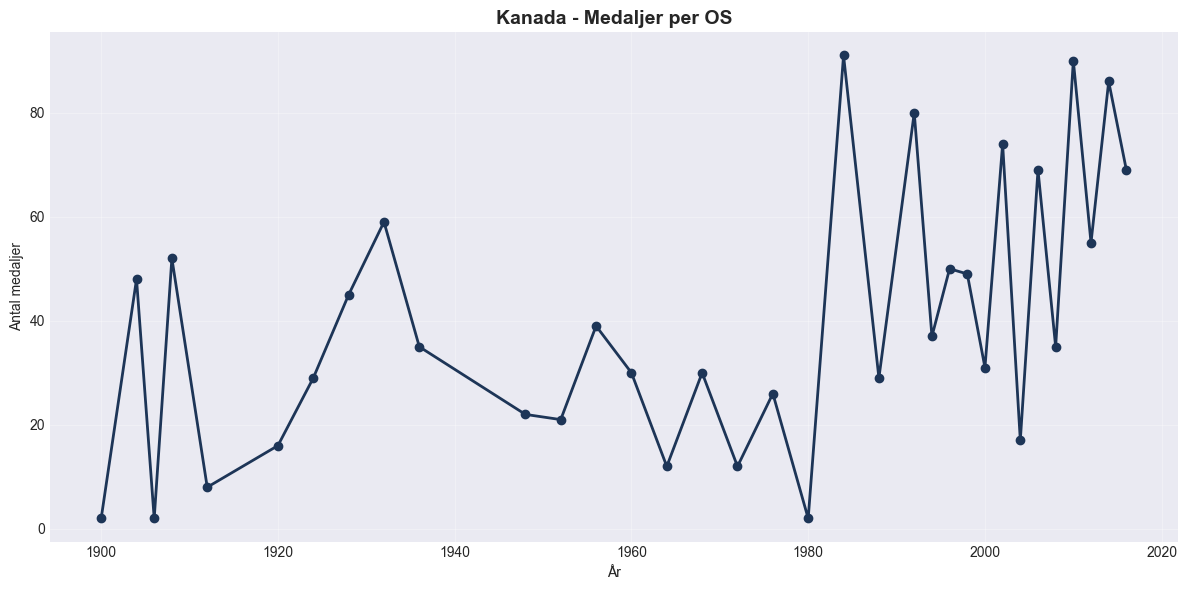

In [43]:
# Canada medals per Olympics
canada_medals_year = canada_df[canada_df['Medal'].notna()].groupby('Year').size()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(canada_medals_year.index, canada_medals_year.values, 
        marker='o', color='#1D3557', linewidth=2, markersize=6)
ax.set_title('Kanada - Medaljer per OS', fontsize=14, fontweight='bold')
ax.set_xlabel('År')
ax.set_ylabel('Antal medaljer')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../figures/canada_medals_per_year.png', dpi=300, bbox_inches='tight')
plt.show()


### 4.4 Kanadas Åldersfördelning

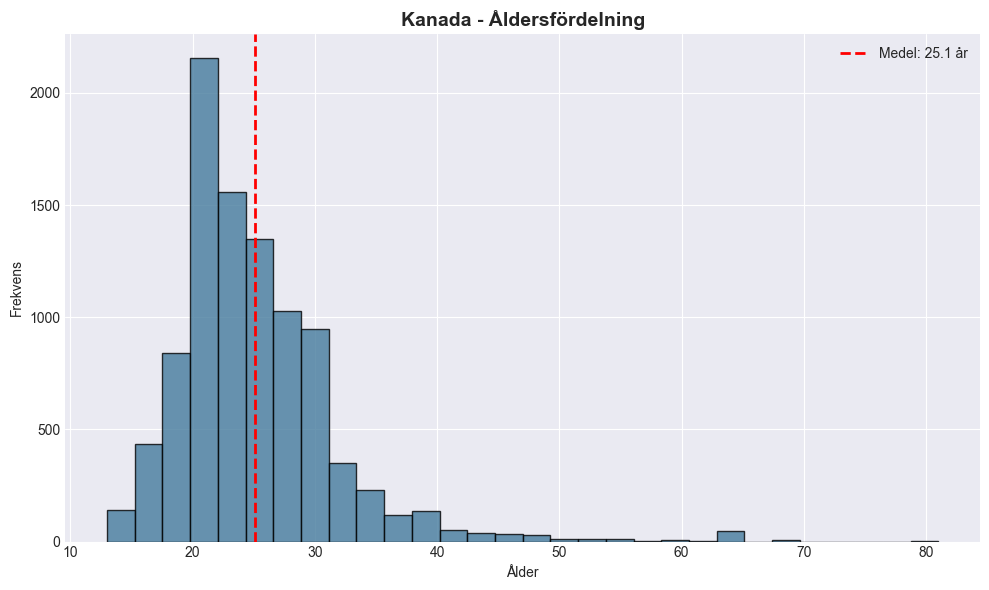

Kanada - Åldersstatistik:
Medel: 25.1 år
Median: 24.0 år
Min: 13.0 år
Max: 81.0 år


In [44]:
# Canada age distribution
canada_ages = canada_df['Age'].dropna()

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(canada_ages, bins=30, color='#457B9D', alpha=0.8, edgecolor='black')
ax.axvline(canada_ages.mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Medel: {canada_ages.mean():.1f} år')
ax.set_title('Kanada - Åldersfördelning', fontsize=14, fontweight='bold')
ax.set_xlabel('Ålder')
ax.set_ylabel('Frekvens')
ax.legend()
plt.tight_layout()
plt.savefig('../figures/canada_age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Kanada - Åldersstatistik:")
print(f"Medel: {canada_ages.mean():.1f} år")
print(f"Median: {canada_ages.median():.1f} år")
print(f"Min: {canada_ages.min()} år")
print(f"Max: {canada_ages.max()} år")


## 5. Sammanfattning

Detta notebook har genomfört en grundlig explorativ dataanalys av olympisk data med fokus på:

